# Fashion MNIST

In this application, we will continue to work on the Fashion MNIST dataset and will try to figure out how are CNNs used with the image data.

Note that we will create a very simple model here and will only talk about the architecture with limited features. Please feel free to add/modify the architecture as per your understanding.

### Libraries, data preprocessing, and visualizations

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data

(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, trainY.shape, X_test.shape, testY.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

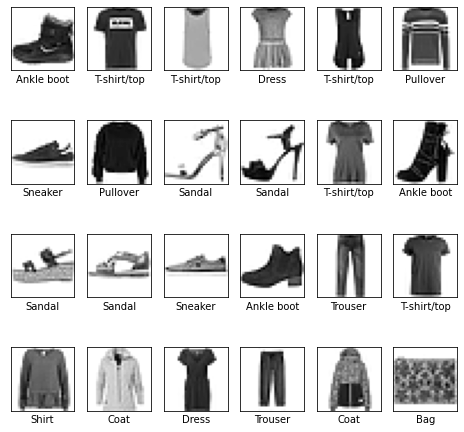

In [5]:
# let's visualize the dataset at hand
import matplotlib.pyplot as plt
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

In [6]:
# Reshaping the training and the testing data. 
# This needs to be reshaped because of the input shape requirement of the CNN

x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

In [7]:
#let's normalize the dataset. Since there are pixel values ranging from 0-255, lets divide by 255 to get the new ranges from 0-1

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Also we will create one hot encoded vectors for the target variable
y_train = tf.keras.utils.to_categorical(trainY)
y_test = tf.keras.utils.to_categorical(testY)

### Model Building

In [8]:
# Imporing the libraries as required. Note that we are using tensorflow.keras here.
import tensorflow as tf
# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

## Model-1

### Question 1 : In CNN last few layers are fully connected layers. So for model1 after flatten add 1 hidden layer with 64 neurons, activation function as relu, and an output layer. Then build the model and the test accuracy of the model lies in the range,

In [11]:
# Initiating the sequential model object
model1 = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model1.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2, 2))) # used to reduce the dimensions of the feature map -> reduces the number of parameters

# Flattening the model and making room for the fully connected component
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
# softmax assigns decimal probability for each class in a multi-class problem

### Question 2: So how many parameters does the Max pooling layer take? (check model summary)

In [12]:
# Let us summarize the model structure
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                200768    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,578
Trainable params: 201,578
Non-trainable params: 0
________________________________________________

### Compiling, fitting and evaluating the test set prediction

In [13]:
# Optimizer for the model, Adam with a learning rate(lr) of 0.01.
optimizer = Adam(learning_rate=0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metrics (accuracy) to look at.
model1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
# Fitting the model with a batch size of 128 and 10 epochs.
model1.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 30s 60ms/step - loss: 6.4709 - accuracy: 0.8051 - val_loss: 0.4304 - val_accuracy: 0.8512
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.3747 - accuracy: 0.8648 - val_loss: 0.4241 - val_accuracy: 0.8515
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.3328 - accuracy: 0.8773 - val_loss: 0.4048 - val_accuracy: 0.8590
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.3062 - accuracy: 0.8854 - val_loss: 0.3940 - val_accuracy: 0.8596
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.2954 - accuracy: 0.8905 - val_loss: 0.4109 - val_accuracy: 0.8596
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2882 - accuracy: 0.8913 - val_loss: 0.4156 - val_accuracy: 0.8649
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2786 - accuracy: 0.8953 - val_loss: 0.4099 - val_accuracy:

### Evaluate the model on the test set

- Let's predict using the test data. 
- The .predict() method in Keras models returns the probabilities of each observation belonging to each class. We will choose the class where the predicted probability is the highest.
- Also, let's build a function to print the classification report and confusion matrix.

In [15]:
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.74      0.76      1000
           3       0.89      0.85      0.87      1000
           4       0.78      0.71      0.74      1000
           5       0.98      0.94      0.96      1000
           6       0.60      0.70      0.65      1000
           7       0.89      0.98      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.97      0.92      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



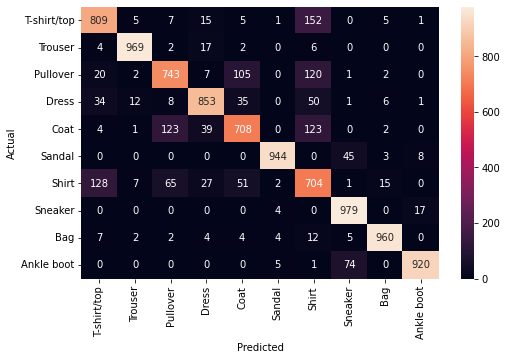

In [16]:
test_pred1 = np.argmax(model1.predict(x_test), axis=-1)

metrics_score(testY, test_pred1)

## Model-2

<b>Question 3:</b> In model1 just you have only one convolution layer, to increase the performance build model2 with 2 convolution layers.One layer has been already implemented for you just add another layer with number of filters,kernel_size,activation and padding same as previous layers.
- Note: Do not pass the input_shape parameter for other convolution layers.It should only be used in the first convolution layer.

In [20]:
# Initiating the sequential model object
model2 = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the model and making room for the fully connected component
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(16, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax')) 

In [21]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                200768    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                        

- The model structure has:
  - 2 convolution layers with 16 filters each of size (3,3) and 'same' padding i.e. the output would be of same size as the input except the depth which would be equal to 16.
  - Max pooling of size (2,2) is applied on the output of the second layer.
  - The output of max pooled images is flattened using the Flatten layer.
  - A Dense layer is used to create a fully connected layer with 64 nodes has been applied to the output of the Flatten layer
  - A batch normalization layer to normalize each batch while training the model i.e. centering and scaling each batch separately. It helps to make the training process faster, reduce overfitting so that the model can generalize appropriately.
  - Again, a Dense layer with 16 nodes and a batch normalization layer
  - Finally, the softmax layer with 10 nodes to get the probabilities of each observation belonging to each class.
- Each node in the batch normalization layer has two non-trainable parameters - mean and variance. Here, we have 2 batch normalization layers with 64 and 16 nodes. So, the model has (64+16)*2 = 160 non-trainable parameters. 

In [22]:
# Optimizer for the model, Adam with a learning rate(lr) of 0.01.
optimizer = Adam(learning_rate=0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metrics (accuracy) to look at.
model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
model2.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 68s 144ms/step - loss: 0.4214 - accuracy: 0.8511 - val_loss: 1.8315 - val_accuracy: 0.6840
Epoch 2/10
469/469 [==============================] - 54s 115ms/step - loss: 0.3075 - accuracy: 0.8882 - val_loss: 0.3366 - val_accuracy: 0.8841
Epoch 3/10
469/469 [==============================] - 55s 116ms/step - loss: 0.2399 - accuracy: 0.9111 - val_loss: 0.2992 - val_accuracy: 0.8951
Epoch 4/10
469/469 [==============================] - 53s 114ms/step - loss: 0.2112 - accuracy: 0.9217 - val_loss: 0.2848 - val_accuracy: 0.8994
Epoch 5/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1873 - accuracy: 0.9310 - val_loss: 0.2620 - val_accuracy: 0.9073
Epoch 6/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1688 - accuracy: 0.9373 - val_loss: 0.2735 - val_accuracy: 0.9085
Epoch 7/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1534 - accuracy: 0.9433 - val_loss: 0.2721 - val_ac

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.85      0.87      1000
           3       0.88      0.94      0.91      1000
           4       0.85      0.86      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.78      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



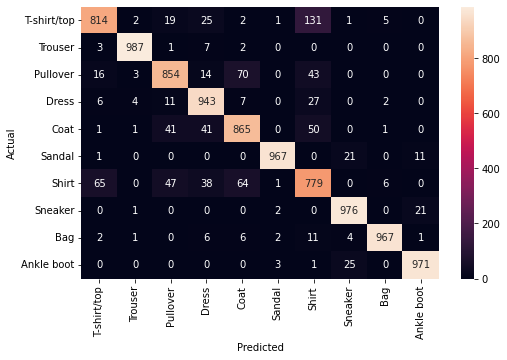

In [24]:
test_pred2 = np.argmax(model2.predict(x_test), axis=-1)

metrics_score(testY, test_pred2)

- There is a hint of overfit in the modelling process. We can use regularization, dropout, batch normalization, and data augmentation to handle it. Feel free to apply these techniques on this dataset.

Let's visualize the images from the test data. 
- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class. 
- Higher the probability more confident the model is about the prediction.

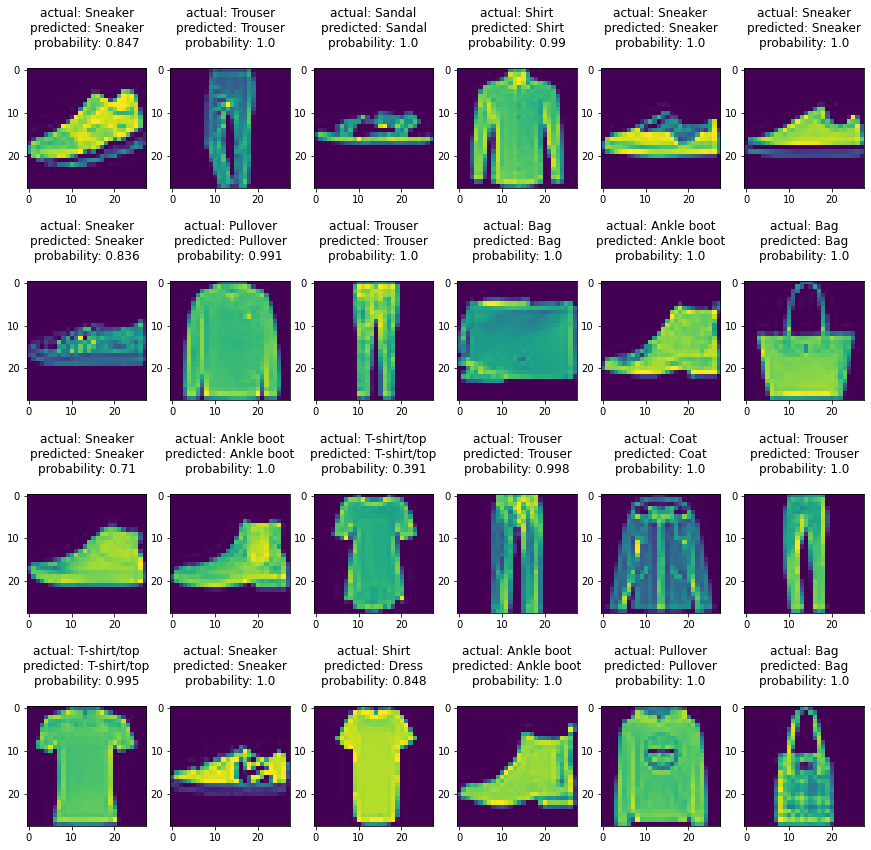

In [25]:
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[test_pred2[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model2.predict(x_test), axis=-1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

### Comments
 - To avoid the overfitting, we can try out dropout layers.
- Note the shape of the training and the testing data for the fitting process. Data should be properly shaped when sending in volumes in the first layer.
- To get better accuracies, one can try to add more convolutional filters, more convolutional and dense layers. However, adding more nodes also increases the time required to fit the model and hence there is a trade-off.
 - In such case, batch normalization comes in handy. It can speed up the training process.

 **Recommendations**
 - Play around with hyperparameters and see if you can improve the accuracy.
 - Try out different optimizers and assess their effect.
 - Also, try out the initializers to check their effect on model building process.